In [10]:
import pandas as pd

In [9]:
import numpy as np


In [8]:
import matplotlib.dates as mdates

In [12]:
turn_over=pd.read_csv('C:/Users/Hp/train.csv')

In [13]:
turn_over.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [14]:
turn_over.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [15]:
turn_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [16]:
turn_over.columns=turn_over.columns.str.replace(' ','_')

In [18]:
turn_over["Order_Date"] = pd.to_datetime(turn_over["Order_Date"], dayfirst = True).dt.date
turn_over["Ship_Date"] = pd.to_datetime(turn_over["Ship_Date"], dayfirst = True).dt.date

In [19]:
turn_over['diff_time']=turn_over['Ship_Date']-turn_over['Order_Date']

In [22]:
turn_over['Month']= pd.DatetimeIndex(turn_over['Order_Date']).month
turn_over['Year']= pd.DatetimeIndex(turn_over['Order_Date']).year

In [23]:
turn_over.groupby('Year')['Sales'].sum()

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

In [24]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'SALES PER YEAR')

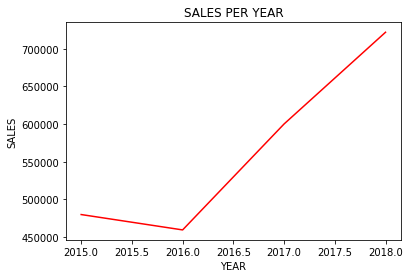

In [27]:
turn_over.groupby('Year')['Sales'].sum().plot(color='Red')
plt.xlabel('YEAR')
plt.ylabel('SALES')
plt.title('SALES PER YEAR')

<AxesSubplot:ylabel='Sales'>

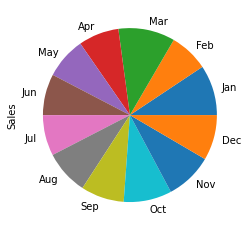

In [34]:
mylabels = ["Jan", "Feb", "Mar", "Apr","May",'Jun','Jul','Aug','Sep','Oct','Nov','Dec']
turn_over.groupby('Month')['Sales'].mean().plot.pie(labels=mylabels)

Text(0.5, 1.0, 'AVERAGE SALES FOR EACH MONTH')

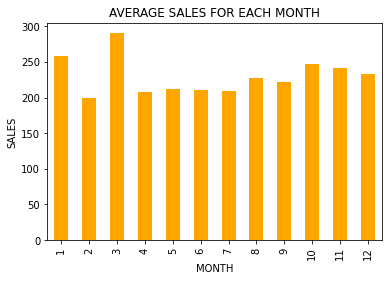

In [45]:
turn_over.groupby('Month')['Sales'].mean().plot.bar(color = 'Orange' )
plt.ylabel("SALES")
plt.xlabel("MONTH")
plt.title("AVERAGE SALES FOR EACH MONTH")

In [46]:
turn_over.groupby("State")["Sales"].sum().sort_values(ascending=False)

State
California              446306.4635
New York                306361.1470
Texas                   168572.5322
Washington              135206.8500
Pennsylvania            116276.6500
Florida                  88436.5320
Illinois                 79236.5170
Michigan                 76136.0740
Ohio                     75130.3500
Virginia                 70636.7200
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48219.1100
Kentucky                 36458.3900
Arizona                  35272.6570
New Jersey               34610.9720
Colorado                 31841.5980
Wisconsin                31173.4300
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27322.9990
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

Text(0.5, 1.0, 'FIVE STATE SALES')

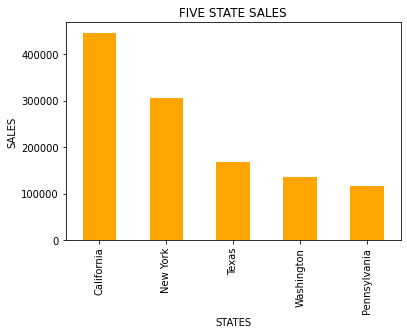

In [53]:
turn_over.groupby("State")["Sales"].sum().sort_values(ascending=False).head().plot.bar(color='Orange')
plt.xlabel("STATES")
plt.ylabel("SALES")
plt.title("FIVE STATE SALES")

In [52]:
turn_over.groupby("City")["Sales"].sum().sort_values(ascending=False)

City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Sales, Length: 529, dtype: float64

Text(0.5, 1.0, 'FIVE CITIES SALES')

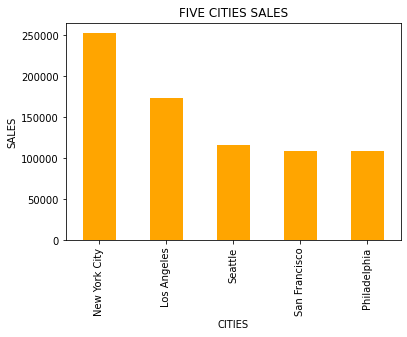

In [54]:
turn_over.groupby("City")["Sales"].sum().sort_values(ascending=False).head().plot.bar(color='orange')
plt.ylabel("SALES")
plt.xlabel("CITIES")
plt.title("FIVE CITIES SALES")

In [55]:
turn_over.groupby("Category")["Sales"].sum().sort_values(ascending=False)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

Text(0.5, 1.0, 'SALES PER CATEGORY')

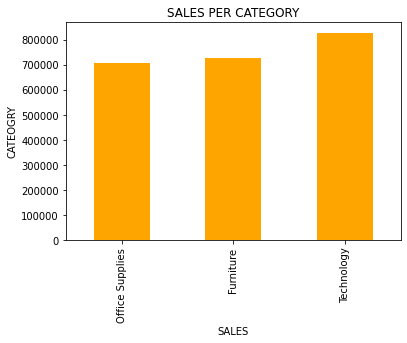

In [57]:
turn_over.groupby("Category")["Sales"].sum().sort_values().plot.bar(color='Orange')
plt.xlabel("SALES")
plt.ylabel("CATEOGRY")
plt.title("SALES PER CATEGORY")

In [58]:
turn_over.groupby(["State","City"])["Sales"].sum().sort_values(ascending=False)

State         City         
New York      New York City    252462.547
California    Los Angeles      173420.181
Washington    Seattle          116106.322
California    San Francisco    109041.120
Pennsylvania  Philadelphia     108841.749
                                  ...    
Florida       Ormond Beach          2.808
              Pensacola             2.214
              Jupiter               2.064
Ohio          Elyria                1.824
Texas         Abilene               1.392
Name: Sales, Length: 600, dtype: float64

In [59]:
turn_over.groupby("Customer_Name")["Sales"].sum().sort_values(ascending=False)

Customer_Name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Mitch Gastineau       16.739
Carl Jackson          16.520
Sung Chung            14.112
Lela Donovan           5.304
Thais Sissman          4.833
Name: Sales, Length: 793, dtype: float64

Text(0.5, 1.0, 'REGULAR CUSTOMERS')

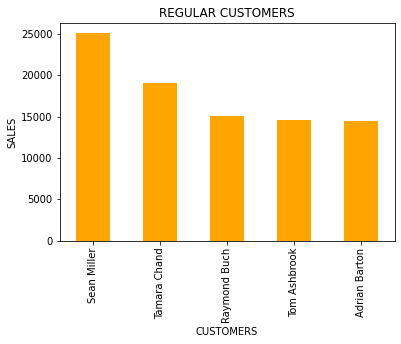

In [61]:
turn_over.groupby("Customer_Name")["Sales"].sum().sort_values(ascending=False).head().plot.bar(color='Orange')
plt.xlabel("CUSTOMERS")
plt.ylabel("SALES")
plt.title("REGULAR CUSTOMERS")

In [64]:
turn_over["Year_Month"] = turn_over["Year"].astype(str) + "-" + turn_over["Month"].astype(str)

In [65]:
turn_over["Year_Month"] = pd.to_datetime(turn_over["Year_Month"]).dt.date

Text(0.5, 1.0, 'SALES TREND')

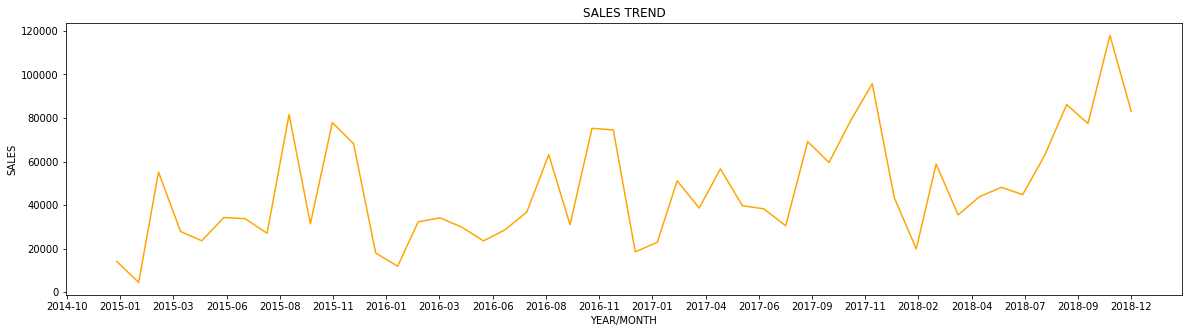

In [68]:
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
turn_over.groupby("Year_Month")["Sales"].sum().plot(color='Orange')
plt.ylabel("SALES")
plt.xlabel("YEAR/MONTH")
plt.title("SALES TREND")

Text(0.5, 1.0, 'SALES TRENDS CATEGORY')

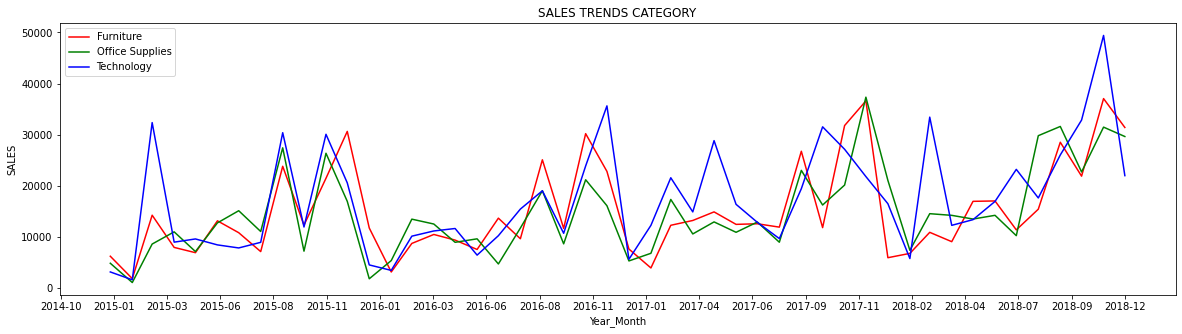

In [72]:
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))
turn_over[turn_over.Category == "Furniture"].groupby("Year_Month")["Sales"].sum().plot(label="Furniture",color='Red')
turn_over[turn_over.Category == "Office Supplies"].groupby("Year_Month")["Sales"].sum().plot(label="Office Supplies",color='Green')
turn_over[turn_over.Category == "Technology"].groupby("Year_Month")["Sales"].sum().plot(label="Technology",color='Blue')
plt.ylabel("SALES")
plt.legend()
plt.title("SALES TRENDS CATEGORY")

In [73]:
sales_trend = turn_over[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_trend = sales_trend.sort_values(by="Year_Month")
sales_trend.head()

,Sales
Year_Month,
2015-01-01,14205.707
2015-02-01,4519.892
2015-03-01,55205.797
2015-04-01,27906.855
2015-05-01,23644.303


In [77]:
sales_data = turn_over[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_data = sales_data.sort_values(by="Year_Month")
sales_data.head()

,Sales
Year_Month,
2015-01-01,14205.707
2015-02-01,4519.892
2015-03-01,55205.797
2015-04-01,27906.855
2015-05-01,23644.303


In [78]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(sales_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.416137
p-value: 0.000278
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


<AxesSubplot:xlabel='Year_Month'>

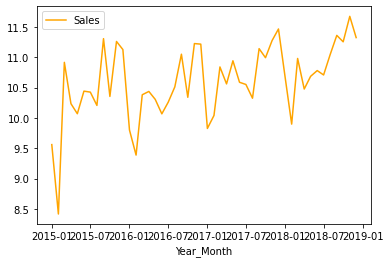

In [79]:
sales_data_log = np.log(sales_data)
sales_data_log.plot(color = 'Orange')

In [80]:
result = adfuller(sales_data_log)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.857927
p-value: 0.000042
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


<AxesSubplot:xlabel='Year_Month'>

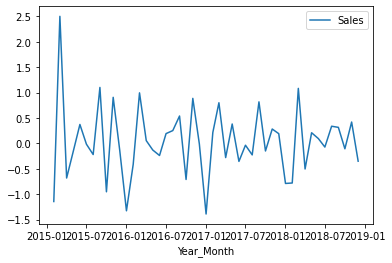

In [81]:
sales_shift = sales_data_log - sales_data_log.shift()
sales_shift.plot()

In [82]:
result = adfuller(sales_shift.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.023950
p-value: 0.000000
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

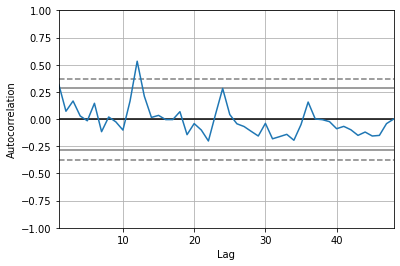

In [83]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales_data_log)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


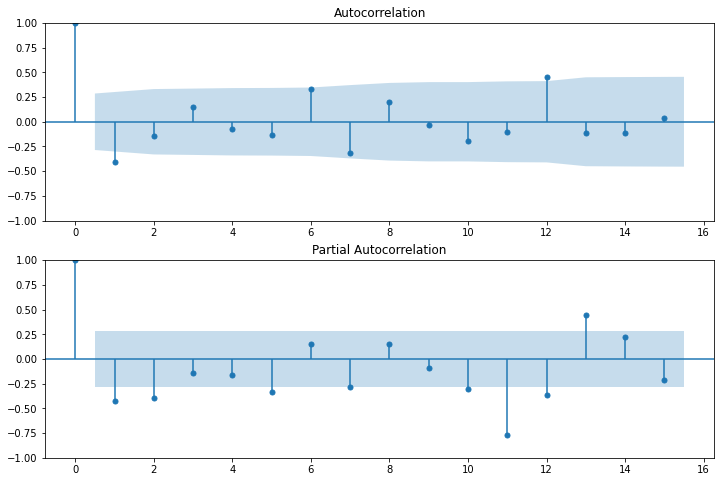

In [85]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_shift.dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_shift.dropna(),lags=15,ax=ax2)

In [86]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(sales_shift,order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -54.820
Date:                Tue, 19 Apr 2022   AIC                            115.640
Time:                        21:10:54   BIC                            121.190
Sample:                    01-01-2015   HQIC                           117.728
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4197      0.116     -3.630      0.000      -0.646      -0.193
ma.L1         -0.9995     16.344     -0.061      0.951     -33.032      31.033
sigma2         0.4078      6.628      0.062      0.951     -12.583      13.399
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.71   Prob(JB):                         0.14
Heteroskedasticity (H):               0.31   Skew:                             0.05
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Year_Month'>

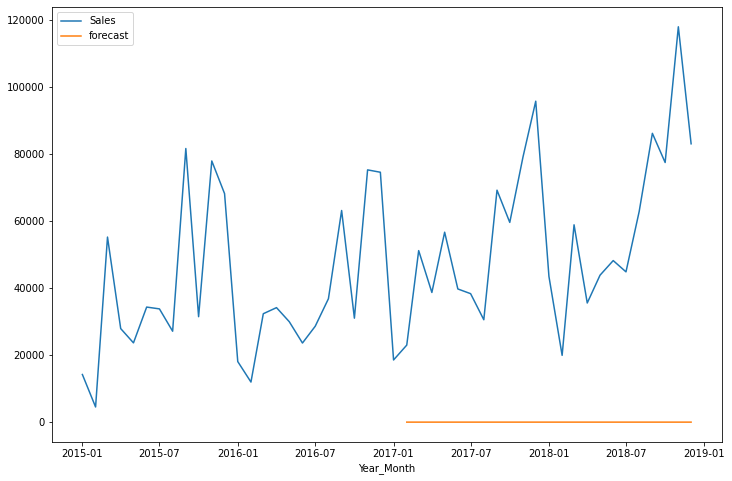

In [87]:
sales_data['forecast']=model_fit.predict(start=25,end=50,dynamic=True)
sales_data[['Sales','forecast']].plot(figsize=(12,8))

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Year_Month'>

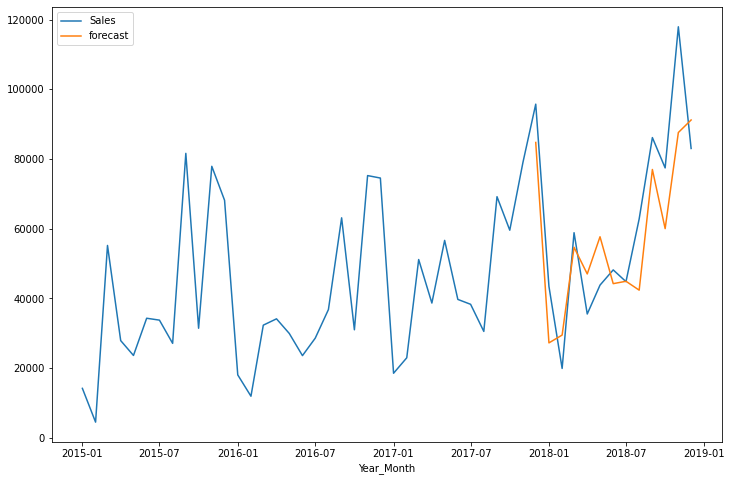

In [88]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales_data['Sales'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()
sales_data['forecast']=results.predict(start=35,end=50,dynamic=True)
sales_data[['Sales','forecast']].plot(figsize=(12,8))

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:2177: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_monotonic_increasing


<AxesSubplot:>

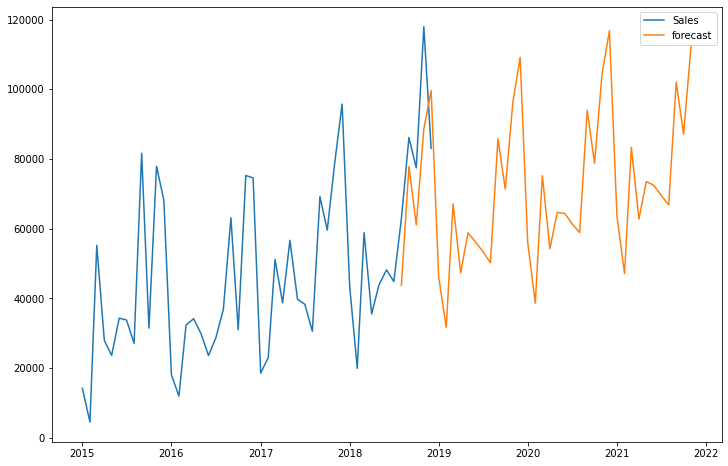

In [89]:
from pandas.tseries.offsets import DateOffset
future_dates=[sales_data.index[-1]+ DateOffset(months=x)for x in range(0,36)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=sales_data.columns)

future_datest_df.tail()

future_df=pd.concat([sales_data,future_datest_df])

future_df['forecast'] = results.predict(start = 43, end = 200, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))